<h1 style = "text-align:center">Building Simple_Linear_Regression
    <h2 style = "text-align:center">From Scratch
        <h3 style = "text-align:center">By Felix Filipi

<h3> Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt    

<h3> Theory of Simple Linear Regression </h3>

First, we need to know the basic formula for Linear Regression:
<h2>$f(x) = w.x + b$</h2>

Where, w = weight, x = feature, and b = intercept / bias

Then we need to find the error, and here we are using Ordinary Least Square (OLS) cost function, and it can be defined as:
<h2>$E = (y_{i} - (w.x_{i}+b))^2$</h2>

Then we need to derivate this function:
<h2>$\frac{\partial{E(w,b)}}{\partial{b}} = -2\Sigma_{i=1}^{n}(y_{i}-w.x_{i}-b)$</h2>

Because the error should be 0, then
<h2>$\Sigma_{i=1}^{n}(y_{i}-w.x_{i}-b)=0$</h2>

So we can substitute the formula and gain:
<h2>$\hat{b} = \bar{y}-w.\bar{x}$</h2>

Where $\bar{y}$ = Y mean, $\bar{x}$ = X mean

And do the same way (derivate partialy) for the weight, and we get the weight formula:

<h2>$\hat{w} = \frac{\Sigma_{i=1}^{n} x_{i}(y_{i}-\bar{y})}{\Sigma_{i=1}^{n} x_{i}(x_{i}-\bar{x})}$</h2>

<h3> Define Class

In [2]:
class Simple_Linear_Regression:

    def get_csv_dataset(self, path):
        ds = np.genfromtxt(path, delimiter =',', skip_header=1)
        return ds

    def MinMaxScaler(self, ds):
        min_max_values = []
        for i in range(len(ds[0])):
            col = [row[i] for row in ds]
            min_value = min(col)
            max_value = max(col)
            min_max_values.append([min_value,max_value])

        for rows in ds:
            for i in range(len(rows)):
                rows[i] = (rows[i]-min_max_values[i][0]) / (min_max_values[i][1]-min_max_values[i][0])

    def mean(self,x):
        means = np.sum(x)/x.shape[0]
        self.means = means
        return self.means

    def get_bias(self,y_mean,weight,x_mean):
        bias = y_mean - weight*x_mean
        self.bias = bias
        return self.bias

    def get_weight(self,feature,target,target_mean,feature_mean):
        denominator = []
        numerator = []
        for i in range(feature.shape[0]):
            num = (feature[i]*(target[i]-target_mean))
            den = (feature[i]*(feature[i]-feature_mean))
            numerator.append(num)
            denominator.append(den)
        numerator = sum(numerator)
        denominator = sum(denominator)
        weight = numerator/denominator
        self.weight = weight
        return self.weight
    
    def fit(self, feature,target):
        self.feature = feature
        self.target = target
        self.feature_mean = self.mean(self.feature)
        self.target_mean = self.mean(self.target)
        self.weight = self.get_weight(feature,target,self.target_mean,self.feature_mean)
        self.bias = self.get_bias(self.target_mean, self.weight, self.feature_mean)
        print('fit model()')
        
    def predict(self,x):
        self.x = x
        self.prediction = abs(self.weight*self.x + self.bias)
        return self.prediction
    
    def visualize(self):
        plt.scatter(self.feature,self.target)
        plt.plot(self.feature,self.prediction)

<h3> Call the class

fit model()


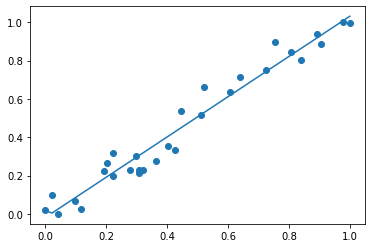

In [3]:
#Call my class
slr = Simple_Linear_Regression()

#Call your dataset
ds = slr.get_csv_dataset('Salary_Data.csv')

#Normalize your dataset
scaled = slr.MinMaxScaler(ds)

#Define your feature and target
feature = ds[:,0]
target = ds[:,1]

#Fit your Model
slr.fit(feature,target)

#Predict your model (in this case using train dataset)
prediction = slr.predict(feature)

#Visualize your model
slr.visualize()